In [96]:
pip install -U scikit-learn

  Using cached scikit_learn-1.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (25.8 MB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached numpy-1.21.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.0.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
#Fetch Data - Dynamically Draw data (Optional Step, in case you skip this step, there is a csv file uploaded here with the same data, we can use that instead of
#this)
import os
import tarfile
import urllib

download_root='https://raw.githubusercontent.com/ageron/handson-ml2/master'  #Root Details of of the data file needs to be searched
housing_path=os.path.join('datasets','housing')                              #Create hierarchy of folders
housing_url=download_root+'/datasets/housing/housing.tgz'                    #The full file path

def fetch_housing_data(housing_url=housing_url,housing_path=housing_path):
    os.makedirs(housing_path, exist_ok=True)                                 #Creating the folders
    tgz_path=os.path.join(housing_path,'housing.tgz')                        #Adding a tgz file to the path
    urllib.request.urlretrieve(housing_url,tgz_path)                         #fetching data in the tgz file path
    housing_tgz=tarfile.open(tgz_path)                                       #Open the tar file
    housing_tgz.extractall(path=housing_path)                                #Extract all the records
    housing_tgz.close()                                                      #Close the file
    
fetch_housing_data(housing_url,housing_path)

In [3]:
#Load the csv file in DataFrame
def load_housing_data(housing_path=housing_path):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)
    
housing_df=load_housing_data(housing_path)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_df.ocean_proximity.value_counts()            #Count the number of rows in each category of ocean_proximity column

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


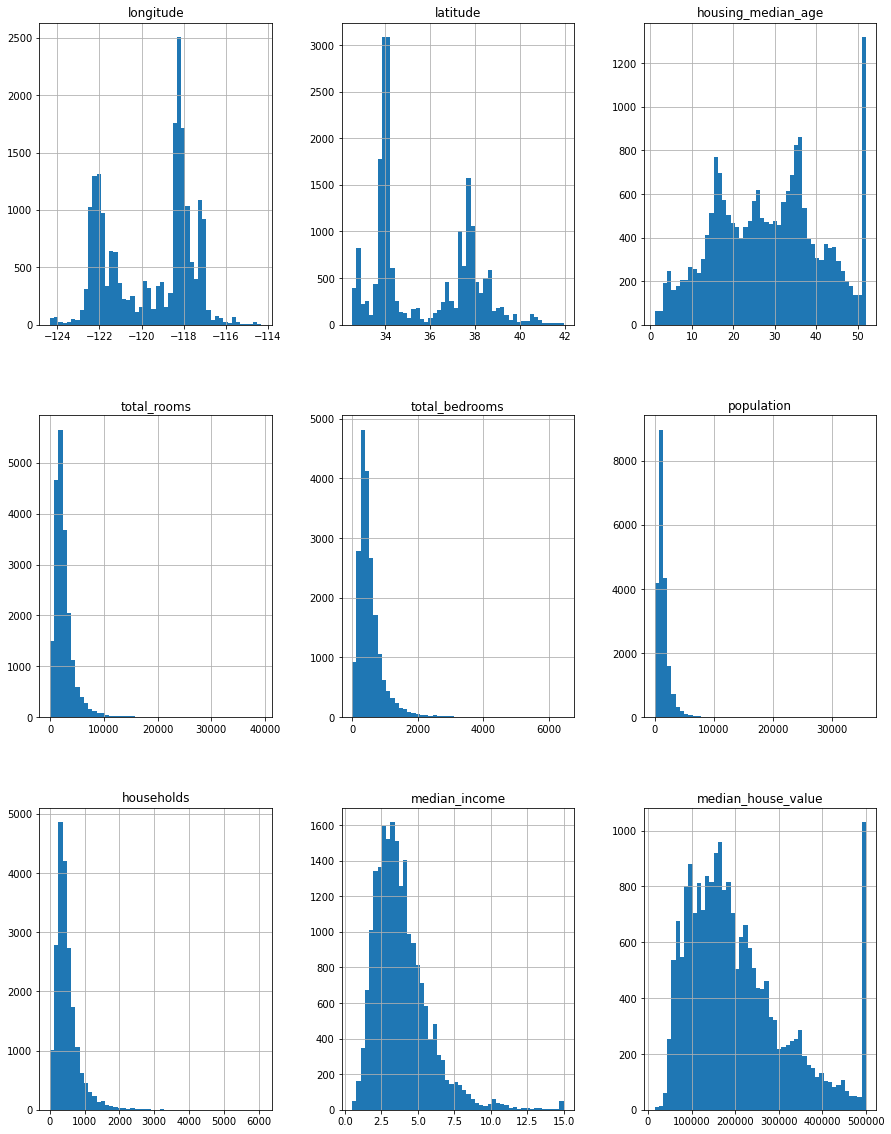

In [7]:
#Some sample Data Visualization
housing_df.hist(bins=50,figsize=(15,20))
plt.show()

In [8]:
#Diving the data in train and test set
train_set,test_set=train_test_split(housing_df, test_size=0.2, random_state=42)          #random state is required to take up random test sample & everytime the data is updated the same records are picked up for test set

<AxesSubplot:>

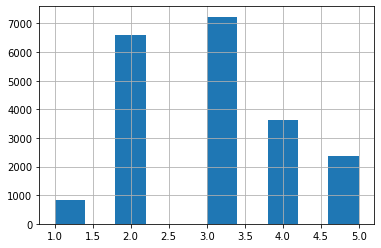

In [9]:
#Median_income is a very imp attribute to predict the housing prices and random sampling may result in sampling biased as most of the income hover over 1.5 to 6 range
#Hence to get a better split between train and test we use StratifiedShuffleSplit
housing_df['income_cat']=pd.cut(housing_df.median_income,bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing_df.income_cat.hist()

In [10]:
#Stratified Split of Data - This method helps to ensure that all class of data is present in the test case. For example in our case all the income_cat data should
#be uniformly divided in the test set, so as to make the effort of prediction easier
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df,housing_df.income_cat):
    strat_train_set=housing_df.loc[train_index]
    strat_test_set=housing_df.loc[test_index]
    
strat_test_set.income_cat.value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [11]:
#Now the data is split and so we can remove the column income_cat
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [12]:
#Creating a copy of the train set
housing_df=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

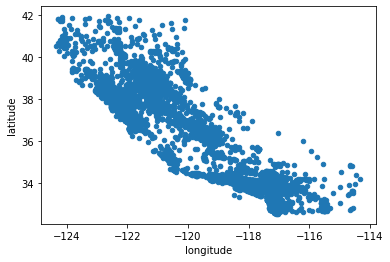

In [13]:
#Geographic Data - Scatter plot of longitude and latitude
housing_df.plot(kind='scatter',x='longitude',y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

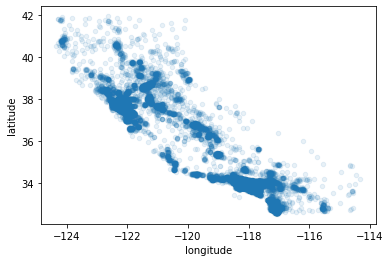

In [14]:
#Reduce the alpha value to check density of data pts
housing_df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

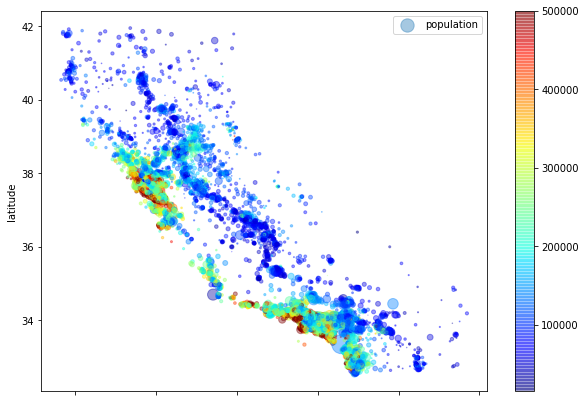

In [15]:
#Adding details to the scatter plot
housing_df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing_df['population']/100,label='population',figsize=(10,7),c=housing_df['median_house_value'],colorbar=True,cmap=plt.get_cmap('jet'))
plt.legend()

In [16]:
#Correlation check among the attributes
corr_matrix=housing_df.corr()

#Checking the correlation of median housing value with all the features
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

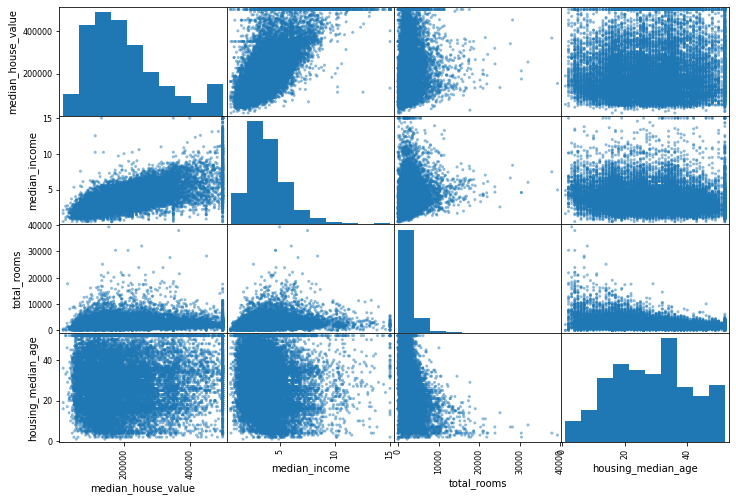

In [17]:
#Selecting a few of the correlated attribute and using scatter_matrix to check the relationship among them
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing_df[attributes],figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='[median_income]', ylabel='[median_house_value]'>

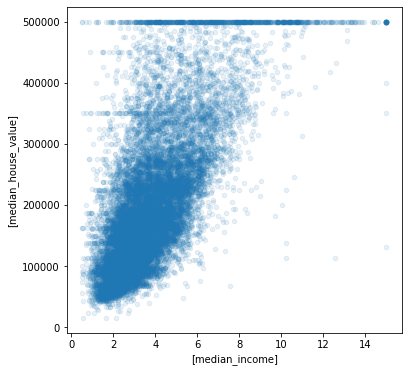

In [18]:
#From above plot it is clear that major correlation is on median_income, so lets built a scatter plot of median income v/s median_house_price
housing_df.plot(kind='scatter',x=['median_income'],y=['median_house_value'],alpha=0.1,figsize=(6,6))

In [19]:
#This can be visited and revisited several times to fine tune the attributes for better performance
#Creating new features
housing_df['rooms_per_household']=housing_df.total_rooms/housing_df.households
housing_df['bedrooms_per_room']=housing_df.total_bedrooms/housing_df.total_rooms
housing_df['population_per_household']=housing_df.population/housing_df.households

#Correlation of all the updated attributes - 
corr_matrix=housing_df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [20]:
#Separating Training data and the label
housing_df=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

In [21]:
#Data Cleaning - total_bedrooms column had missing value,, so we are addressing them using Imputer Class
imputer=SimpleImputer(strategy='median')                       #Works only on numerical data

#Remove non-numerical column
housing_num=housing_df.drop('ocean_proximity',axis=1)

#fit the imputer and the consisting median details are stored in imputer.statistics_
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)

#Replace the missing 
X=imputer.transform(housing_num)                              #Returns a NumPy array
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [22]:
#Handling Catagorical Variables
housing_cat=housing_cat=housing_df[['ocean_proximity']]

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [23]:
#Creating new feature using a class this will help us when we use Pipeline to fit, transform and fit_transform all the data
from sklearn.preprocessing import FunctionTransformer

rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_df.values)

In [24]:
#Using pipeline for Numerical Data Transform
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [25]:
#Using one tranformer for both numerical and catagorical data
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_df)

In [26]:
#Model building
#Model 1
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [27]:
#Model1 Evaluation
from sklearn.metrics import mean_squared_error

housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [28]:
#Model Building - DecisionTreeRegressor
#Model2
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [29]:
#Model2 
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [30]:
#Solving the problem of under and overfit of the above 2models
#Implementing DecisionTess Using CV
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [31]:
tree_rmse_scores.mean()

70889.35258536339

In [32]:
#Implementing LinearRegression Using CV
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

In [33]:
lin_rmse_scores.mean()

69052.46136345083

In [34]:
#Model 3 Using Ensemble - RandomForest
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

In [35]:
forest_rmse_scores.mean()

52583.72407377466

In [36]:
#Hyperparameter tuning of model3 using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
            {'bootstrap': [False],'n_estimators':[3,10],'max_features':[2,3,4]}
           ]

In [37]:
#Using the param_grid variable to model RandomForestRegressor problem -
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
#Finding out which set of features and estimator did best in fitting the training data
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [39]:
#Best Estimator value
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [40]:
#CV Mean scores for each combination of GridSearchCV
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

63796.31360573448 {'max_features': 2, 'n_estimators': 3}
55720.599555640394 {'max_features': 2, 'n_estimators': 10}
52926.97692741351 {'max_features': 2, 'n_estimators': 30}
60120.90801712193 {'max_features': 4, 'n_estimators': 3}
53267.20358348676 {'max_features': 4, 'n_estimators': 10}
50584.76788932934 {'max_features': 4, 'n_estimators': 30}
58963.07466656084 {'max_features': 6, 'n_estimators': 3}
52337.00050234639 {'max_features': 6, 'n_estimators': 10}
50106.75936599088 {'max_features': 6, 'n_estimators': 30}
58966.89724506269 {'max_features': 8, 'n_estimators': 3}
52409.97549538489 {'max_features': 8, 'n_estimators': 10}
50054.520453504665 {'max_features': 8, 'n_estimators': 30}
62818.553634053795 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54108.833555542195 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60282.06240435456 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52856.19719264742 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [41]:
#Finding out feature importance of RandomForest Model generated using GridSearchCV
feature_importance=grid_search.best_estimator_.feature_importances_
feature_importance

array([7.56163013e-02, 7.03717911e-02, 4.27543379e-02, 1.60947371e-02,
       1.46145638e-02, 1.50631583e-02, 1.34030822e-02, 3.68062932e-01,
       5.10922336e-02, 1.11555015e-01, 6.09814605e-02, 8.35185516e-03,
       1.46786904e-01, 1.59885620e-04, 2.17292679e-03, 2.91881532e-03])

In [42]:
#Mapping feature_importance to their corresponding attribute name
extra_attribs=['rooms_per_household','pop_per_household','bedrooms_per_room']
cat_encoder=full_pipeline.named_transformers_['cat']                                #Returns the type of encoder used to Encode the catagorical variables
cat_one_hot_attribs=list(cat_encoder.categories_[0])                                #Returns the value of each column of one-hot-encoder
attributes=num_attribs + cat_one_hot_attribs + extra_attribs                        #All the attributes combined

sorted(zip(feature_importance, attributes), reverse=True)

[(0.3680629321990008, 'median_income'),
 (0.1467869038393533, 'NEAR OCEAN'),
 (0.11155501528806382, 'INLAND'),
 (0.07561630126548752, 'longitude'),
 (0.07037179108758666, 'latitude'),
 (0.06098146046131862, 'ISLAND'),
 (0.05109223363495989, '<1H OCEAN'),
 (0.04275433789438754, 'housing_median_age'),
 (0.016094737102356777, 'total_rooms'),
 (0.01506315830069799, 'population'),
 (0.014614563804431796, 'total_bedrooms'),
 (0.013403082230882006, 'households'),
 (0.00835185515624573, 'NEAR BAY'),
 (0.0029188153245598126, 'bedrooms_per_room'),
 (0.0021729267905336164, 'pop_per_household'),
 (0.00015988562013408324, 'rooms_per_household')]

In [43]:
#Model Evaluation on Test Set
final_model=grid_search.best_estimator_

X_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()

X_test_prepared=full_pipeline.transform(X_test)

In [44]:
#Final prediction
final_predictions=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

47463.10433402356

In [45]:
#Measuring precision of the model using scipy.stats function
from scipy import stats

confidence=0.95
squared_errors=(final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([45468.79998057, 49376.92552571])

In [46]:
#--------------------------------------------------------------

In [51]:
#SVR model of housing price
from sklearn.svm import SVR

param=[
    {'kernel':['linear'],'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
    'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svr_reg=SVR()
svr_search=GridSearchCV(svr_reg,param,cv=5,scoring='neg_mean_squared_error',verbose=2, n_jobs=4)
svr_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  13.3s
[CV] END ..............................C=10.0, kernel=linear; total time=  13.4s
[CV] END .............................C=100.0, kernel=linear; total time=  12.4s
[CV] END .............................C=100.0, kernel=linear; total time=  13.1s
[CV] END .............................C=300.0, kernel=linear; total time=  13.3s
[CV] END ............................C=1000.0, kernel=linear; total time=  13.3s
[CV] END ............................C=3000.0, kernel=linear; total time=  14.1s
[CV] END ...........................C=10000.0, kernel=linear; total time=  15.9s
[CV] END ...........................C=10000.0, kernel=linear; total time=  16.2s
[CV] END ...........................C=30000.0, kernel=linear; total time=  24.7s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=  23.2s
[CV] END ......................C=1.0, gamma=0.0

In [54]:
negative_mse=svr_search.best_score_
rmse=np.sqrt(-negative_mse)
rmse

70363.84006006805

In [48]:
#RandomForest with Hyperpatameter processing
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_param={
    'n_estimators': randint(low=1,high=200),
    'max_features': randint(low=1,high=8)
}

forest_reg=RandomForestRegressor(random_state=42)
random_search=RandomizedSearchCV(forest_reg,random_param,n_iter=10,cv=5,scoring='neg_mean_squared_error',random_state=42)
random_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2e1cacfc70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2e1cbade20>},
                   random_state=42, scoring='neg_mean_squared_error')

In [49]:
randres=random_search.cv_results_
for mean_score, params in zip(randres['mean_test_score'],randres['params']):
    print(np.sqrt(-mean_score), params)

49150.70756927707 {'max_features': 7, 'n_estimators': 180}
51389.889203389284 {'max_features': 5, 'n_estimators': 15}
50796.155224308866 {'max_features': 3, 'n_estimators': 72}
50835.13360315349 {'max_features': 5, 'n_estimators': 21}
49280.9449827171 {'max_features': 7, 'n_estimators': 122}
50774.90662363929 {'max_features': 3, 'n_estimators': 75}
50682.78888164288 {'max_features': 3, 'n_estimators': 88}
49608.99608105296 {'max_features': 5, 'n_estimators': 100}
50473.61930350219 {'max_features': 3, 'n_estimators': 150}
64429.84143294435 {'max_features': 5, 'n_estimators': 2}


In [50]:
random_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [72]:
rand_model=random_search.best_estimator_
rand_predictions=final_model.predict(X_test_prepared)
rand_mse=mean_squared_error(y_test,rand_predictions)
rand_rmse=np.sqrt(rand_mse)
rand_rmse

47658.247121159526

In [56]:
from scipy.stats import expon, reciprocal
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2e1caaad30>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2e1cb24a60>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=  13.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=  12.7s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  23.4s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf; total time=  19.9s
[CV] END C=432.37884813148855, gamma=0.15416196746656105, kernel=linear; total time=  12.1s
[CV] END C=432.37884813148855, gamma=0.15416196746656105, kernel=linear; total time=  12.6s
[CV] END C=24.17508294611391, gamma=3.503557475158312, kernel=rbf; total time=  20.6s
[CV] END C=113564.03940586245, gamma=0.0007790692366582295, kernel=rbf; total time=  19.6s
[CV] END C=108.30488238805073, gamma=0.3627537294604771, kernel=rbf; total time=  19.4s
[CV] END C=108.30488238805073, gamma=0.3627537294604771, kernel=rbf; total time=  19.6s
[CV] END C=21.344953672647435, gamma=0.023332523598323388, kernel=linear; total time=  12.7s
[CV] END C=5603.2

In [57]:
negative_mse=rnd_search.best_score_
rmse=np.sqrt(-negative_mse)
rmse

54767.960710084124

In [87]:
#Model with top k features-
def indices_of_top_k_features(arr,k):
    return np.sort(np.argpartition(np.array(arr),-k)[-k:])                              #np.argparition helps in partitioning the array into desired values

class TopFeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importance, k):
        self.feature_importance=feature_importance
        self.k=k
    def fit(self,X,y=None):
        self.feature_indices_=indices_of_top_k_features(self.feature_importance, self.k)
        return self
    def transform(self,X):
        return X[:,self.feature_indices_]

In [88]:
#Finding out top 5 features
k=5
top_k_feature_indices = indices_of_top_k_features(feature_importance, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [89]:
np.array(attributes)[top_k_feature_indices]
sorted(zip(feature_importance, attributes), reverse=True)[:k]

[(0.3680629321990008, 'median_income'),
 (0.1467869038393533, 'NEAR OCEAN'),
 (0.11155501528806382, 'INLAND'),
 (0.07561630126548752, 'longitude'),
 (0.07037179108758666, 'latitude')]

In [101]:
#Creating Preparation and Feature selection Pipeline
prep_and_feature_selection_pipeline=Pipeline([
    ('preparation',full_pipeline),
    ('feature_selection',TopFeatureSelection(feature_importance,k))
])
    
housing_prepared_top_k_features = prep_and_feature_selection_pipeline.fit_transform(housing_df)

In [102]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [103]:
housing_prepared[0:3,top_k_feature_indices]
#Both cell 93 and 95 returns the same data, hence we can say our transformation worked fine

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [ ]:
#Pipeline creation for data preparation and prediction

In [110]:
#Creating pipeline for preparation and prediction
prep_select_and_predict_pipeline=Pipeline([
    ('preparation',full_pipeline),
    ('feature_selection',TopFeatureSelection(feature_importance,k)),
    ('svm_model', SVR(**rnd_search.best_params_))
])

housing_prepared_select_predict=prep_select_and_predict_pipeline.fit(housing_df,housing_labels)

In [112]:
predictions=housing_prepared_select_predict.predict(housing_df[0:4])
predictions

array([203214.28978849, 371846.88152572, 173295.65441611,  47328.3970888 ])

In [113]:
housing_labels[0:4]

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
Name: median_house_value, dtype: float64